A fast and to-the-point series of essential recipes in matplotlib that can
get you started with visualization and you can refer to anytime you need to create a specific graphic chart.

The matplotlib is a Python package for plotting graphics. Created by John Hunter,
it has been developed in order to address a lack of integration between Python and
external software with graphical capabilities, such as MATLAB or gnuplot.

Each pyplot command makes a change on a figure. Once you set a figure, all
additional commands will operate on it. Thus, it is easy to incrementally improve
and enrich our graphic representation. All the examples we present are therefore
expressed in commented building blocks so that you can later draft your basic
representation and then look for specific commands in our examples in order to
improve it as you plan.

With the pyplot.figure() command, you can initialize a new visualization,
though it suffices to call a plotting command to automatically start it. Instead,
by using pyplot.show(), you close the figure that you were operating on and
you can open new figures.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## Curve plotting

Drawing a
function is very simple; you just have to get a series of x coordinates and map
them to the y axis by using the function that you want to plot. Since the mapping
results are stored away in two vectors, the plot function will deal with the curve
representation whose precision will be greater if the mapped points are enough (100
points is a good sampling number)

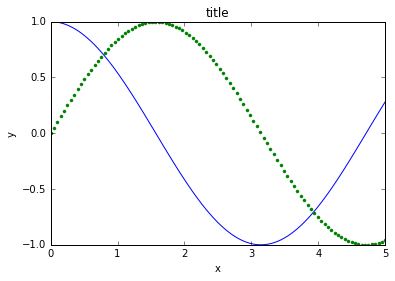

In [2]:
# Curve plotting
import numpy as np
import matplotlib.pyplot as plt
#linspace to create 100 equally distanced numbers ranging from zero to five 
x = np.linspace(0, 5, 100)
y_cos = np.cos(x)
y_sin = np.sin(x)
#map the sine and cosine functions
plt.figure() # initialize a figure
plt.plot(x,y_cos) # plot series of coordinates as a line
plt.plot(x,y_sin,'.')# plot series of coordinates as a separated points
plt.xlabel('x') # adds label to x axis
plt.ylabel('y') # adds label to y axis
plt.title('title') # adds a title
plt.show() # close a figure

## Using panels

We will also try to personalize your curves more by using
different colors, sizes, and styles.

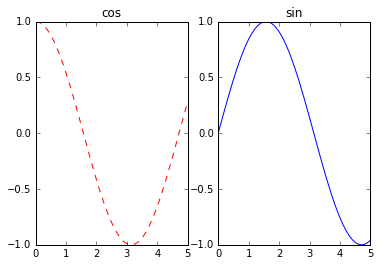

In [3]:
# Using panels
import matplotlib.pyplot as plt
plt.subplot(1,2,1) # defines 1 row 2 column panel, activates figure 1
plt.plot(x,y_cos,'r--')
plt.title('cos') # adds a title
plt.subplot(1,2,2) # defines 1 row 2 column panel, activates figure 2
plt.plot(x,y_sin,'b-')
plt.title('sin') 
plt.show()

# Some references for further personalizations:
# http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle
# http://matplotlib.org/api/colors_api.html
# http://matplotlib.org/api/markers_api.html
# http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D

# It is possible to have customer colors by RGB values (in range [0-1])
# plt.plot(x,y_sin,'b-',color = (0.1,0.9,0.9))
# The curve's color will be cyan

The subplot command accepts the subplot(nrows, ncols, plot_number)
parameter form. Therefore, it reserves a certain amount of space for the
representation based on the nrows and ncols parameters and plots on the plot_
number area (starting from the area 1 on the left).

## Scatterplots

We will create three data clusters
and represent them in a scatterplot with different shapes and colors

In [4]:
# Scatterplot
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

D = make_blobs(n_samples=150, n_features=2, centers=3, random_state=7)
groups = D[1]
coordinates = D[0]



Since we have to plot three different groups, we will have to use three distinct plot
commands. Each command specifies a different color and shape (the 'ys', 'm*',
'rD' strings, where the first letter is the color and the second is the marker). Please
also note that each plot instance is marked by a label parameter, which is used to
assign a name to the group that has to be reported later in a legend

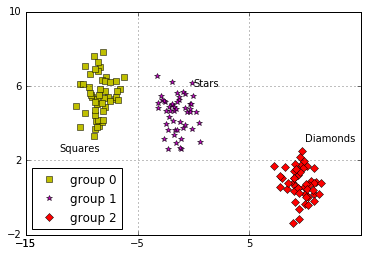

In [5]:
plt.plot(coordinates[groups==0,0], coordinates[groups==0,1], 'ys', label='group 0') # yellow square
plt.plot(coordinates[groups==1,0], coordinates[groups==1,1], 'm*', label='group 1') # magenta stars
plt.plot(coordinates[groups==2,0], coordinates[groups==2,1], 'rD', label='group 2') # red diamonds
plt.ylim(-2,10) # redefines the limits of y axis
plt.yticks([10,6,2,-2]) # redefines y axis ticks
plt.xticks([-15,-5,5,-15]) # redefines x axis ticks
plt.grid() # adds a grid
plt.annotate('Squares', (-12,2.5)) # prints text at coordinates
plt.annotate('Stars', (0,6))
plt.annotate('Diamonds', (10,3))
plt.legend(loc='lower left', numpoints= 1) # places a legend of labelled items
plt.show()

We have also added a legend (pyplot.legend), fixed a
limit for both the axes (pyplot.xlim and pyplot ylim), and precisely explicated
the ticks (plt.xticks and plt.yticks) that had to be put on them by specifying a
list of values. Therefore, the grid (pyplot.grid) divides the plot exactly into nine
quadrants and allows you to have a better idea of where the groups are positioned.
We then printed some text with the group names (pyplot.annotate).

## Histograms

We will
visualize two normal distributions—both with unit standard deviation, but one
with a mean of zero and the other with a mean of 3.0:

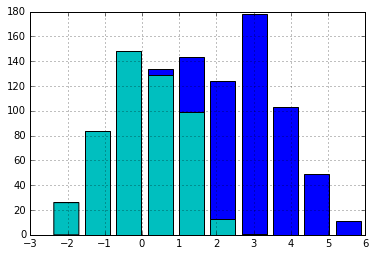

In [6]:
# Histograms
import numpy as np
import matplotlib.pyplot as plt
x = np.random.normal(loc=0.0, scale=1.0, size=500)
z = np.random.normal(loc=3.0, scale=1.0, size=500)
plt.hist(np.column_stack((x,z)), bins=10, histtype='bar', color = ['c','b'], stacked=True)
plt.grid()
plt.show()

# Also try these further parameters for plt.hist
# normed=1
# histtype='step'
# stacked = False
# fill = False

Calculate the optimal number of bin width using Freedman–Diaconis rule:
    https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
        
Then the number of bins can therefore be
computed by dividing the difference between the maximum and the minimum value
by h(bin width):
bins = (max −min) / h

We can also change the type of visualization from bars to steps by changing the
parameters from histtype='bar' to histtype='step'. By changing the Boolean parameter
stacked to False, the curves won't stack into a unique bar in the parts that overlap,
but you will clearly see the separate bars of each one.

## Bar graphs

we will present the mean and standard deviation for the four
variables of the Iris dataset

In [7]:
# Bar graphs
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
average = np.mean(iris.data, axis=0) 
std     = np.std(iris.data, axis=0) 
range_  = range(np.shape(iris.data)[1])

we will prepare two subplots—one with horizontal bars (plt.
barh), and the other with vertical bars (plt.bar). The standard error is represented
by an error bar, and according to the graph orientation, we can use the xerr
parameter for horizontal bars and yerr for the vertical ones:

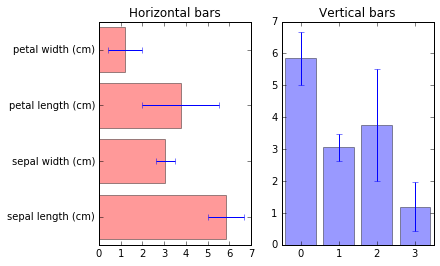

In [8]:
plt.subplot(1,2,1) # defines 1 row 2 column panel, activates figure 1
plt.title('Horizontal bars')
plt.barh(range_,average, color="r", xerr=std, alpha=0.4, align="center")
plt.yticks(range_, iris.feature_names)
plt.subplot(1,2,2) # defines 1 row 2 column panel, activates figure 2
plt.title('Vertical bars')
plt.bar(range_,average, color="b", yerr=std, alpha=0.4, align="center")
plt.xticks(range_, range_)
plt.show()

It is important to note the use of the plt.xticks command (and plt.yticks for
the ordinate axis). The first parameter informs the command about the number of
ticks that have to be placed on the axis, and the second one explicates the labels
that have to be put on the ticks.

Another interesting parameter to notice is alpha, which has been used to set the
transparency level of the bar. The alpha parameter is a float number ranging from
0.0, fully transparent, to 1.0, which is a solid color.

## Image visualization

Using plt.imgshow
is useful when you are working with image data. Let's take as an example the
Olivetti dataset, an open source set of images of 40 people who provided 10 images
of themselves at different times and with different expressions. The images are
provided as features vectors of pixel intensities. So, it is important to reshape the
vectors in order to make them resemble a matrix of pixels. Setting the interpolation
to 'nearest' helps you smoothen the picture:

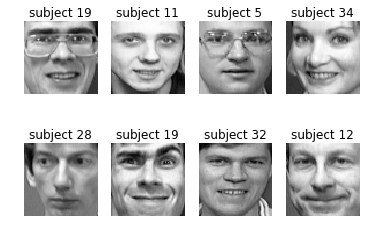

In [28]:
# Image visualization: Olivetti dataset
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_olivetti_faces(shuffle=True, random_state=5)
photo = 1
#k =1
for k in range(1,9):  
#while k < 9:
    plt.subplot(2,4,k)
    plt.imshow(dataset.data[k].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('subject '+str(dataset.target[k]))
    plt.axis('off')
    #k = k + 1
plt.show()

Visualization can be applied to handwritten digit or writing recognition. We will plot
the first nine digits from the Scikit-learn handwritten digit dataset and set the extent
of both the axes (by using the extent parameter and providing a list of minimum
and maximum values) to align the grid to the pixels

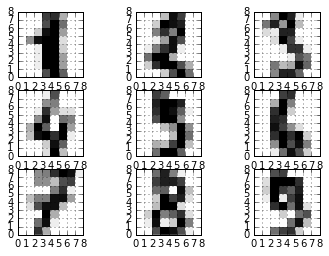

In [25]:
# Image visualization: handwritten digits
from sklearn.datasets import load_digits
digits = load_digits()
for number in range(1,10):
    plt.subplot(3, 3, number)
    plt.imshow(digits.images[number],cmap='binary',interpolation='none', extent=[0,8,0,8])
    plt.grid()
plt.show()

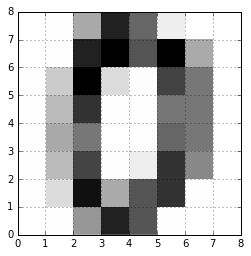

In [29]:
# Image visualization: handwritten digits, a close up
plt.imshow(digits.images[0],cmap='binary',interpolation='none', extent=[0,8,0,8])
# Extent defines the images max and min of the horizontal and vertical values
plt.grid()
plt.show()